# ACTIVIDAD 1 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Se carga el dataset

In [6]:
Train = pd.read_csv("C:/Users/GreenSQA/Documents/curso machine learning/train.csv")
Train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Se verifica si hay variables con datos faltantes

In [14]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

se eliminan las variables las cuales tienen mas del 20% de los datos nulos,estas son:
    
Alley : 1369 datos nulos
PoolQC : 1453 datos nulos
Fence : 1179 datos nulos
MiscFeature : 1406 datos nulos
FireplaceQu : 690 datos nulos

además se elimina la columna id puesto que no es necesaria

In [15]:
Train = Train.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu','Id'],axis=1)

In [12]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Se separan las variables numéricas de las categóricas

In [16]:
NumCol = Train.select_dtypes(include=['int64','float64']).columns
NumCol

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [17]:
CatCol= Train.select_dtypes(include=['object']).columns
CatCol

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

De las variables numéricas se verifica si hay datos faltantes, se encuentra que estas variables tienen datos nulos:

LotFrontage: 259 datos nulos
MasVnrArea: 8 datos nulos
GarageYrBlt: 81 datos nulos


In [18]:
Train[NumCol].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

se observa el coeficiente de variación de estas variables para saber si la media es una buena medida de tendencia central para reemplazar los datos nulos

In [19]:
IncompleteNum = Train.loc[:,["LotFrontage", "MasVnrArea", "GarageYrBlt"]]
IncompleteNum.describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1460.000000,1452.000000,1460.000000
mean,70.049958,103.685262,1978.506164
std,22.024023,181.066207,23.994583
min,21.000000,0.000000,1900.000000
25%,60.000000,0.000000,1962.000000
50%,70.049958,0.000000,1978.506164
75%,79.000000,166.000000,2001.000000
max,313.000000,1600.000000,2010.000000


In [20]:
CofVar = IncompleteNum.std()/IncompleteNum.mean()
CofVar

LotFrontage    0.314405
MasVnrArea     1.746306
GarageYrBlt    0.012128
dtype: float64

Las variables LotFrontage y GarageYrBlt tienen coeficientes de variación bajos, por lo cual se reemplazan los valores nulos con la media, por otro lado la variable MasVnrArea tien mucha disperción en los datos, por lo tanto para esta se reemplazan los datos nulos con la moda

In [148]:
Train.LotFrontage.fillna(Train.LotFrontage.mean(), inplace=True)
Train.GarageYrBlt.fillna(Train.GarageYrBlt.mean(), inplace=True)
Train.MasVnrArea.fillna(Train.MasVnrArea.mode().iloc[0], inplace=True)
Train[NumCol].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1460 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

Se observa si en las variables categóricas hay datos faltantes, se encuentra que hay 11 variables con datos nulos, estos se reemplazan con la moda para cada variable

In [22]:
Train[CatCol].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  MasVnrType     1452 non-null   object
 17  ExterQual      1460 non-null   object
 18  ExterCond      1460 non-null

In [23]:
Train[CatCol] = Train[CatCol].fillna(Train[CatCol].mode().iloc[0])
Train[CatCol].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  MasVnrType     1460 non-null   object
 17  ExterQual      1460 non-null   object
 18  ExterCond      1460 non-null

Ahora el dataset esta listo y no tiene datos faltantes

In [24]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

Se crea la matriz de corelación de las variables numéricas

In [25]:
Train.loc[:,NumCol].corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179700,0.215828,0.043340,...,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.179700,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.043340,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


En la matriz de corelación se puede observar que hay unas variables que tienen un coeficiente de corelación importante comparado con la variable SalePrice

In [26]:
Train.loc[:,["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF", "SalePrice"]].corr()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,SalePrice
OverallQual,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.790982
GrLivArea,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.708624
GarageCars,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.640409
GarageArea,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.623431
TotalBsmtSF,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.613581
1stFlrSF,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.605852
SalePrice,0.790982,0.708624,0.640409,0.623431,0.613581,0.605852,1.000000


Para cada una de estas variables se crea un gráfico de corelación, en donde se puede observar que a medida que aumenta el valor de las variables también aumenta el precio de la casa, estas variables son:

OverallQual: Overall material and finish quality
GrLivArea: Above grade (ground) living area square feet
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
TotalBsmtSF: Total square feet of basement area
1stFlrSF: First Floor square feet

In [27]:
from matplotlib import pyplot

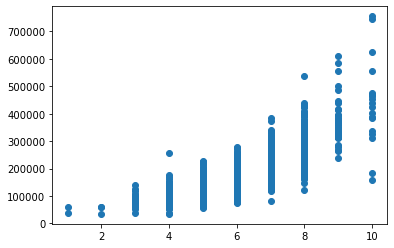

In [28]:
pyplot.scatter(Train["OverallQual"], Train["SalePrice"])

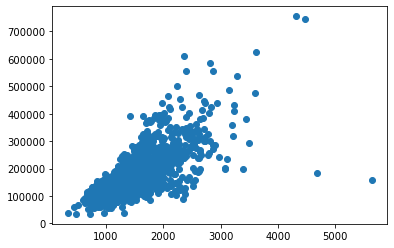

In [29]:
pyplot.scatter(Train["GrLivArea"], Train["SalePrice"])

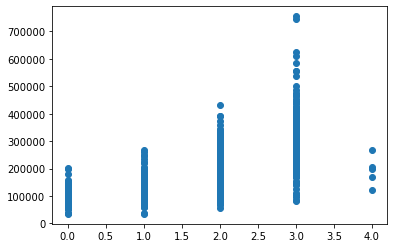

In [30]:
pyplot.scatter(Train["GarageCars"], Train["SalePrice"])

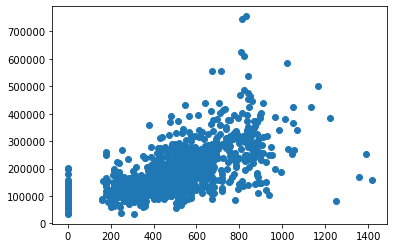

In [31]:
pyplot.scatter(Train["GarageArea"], Train["SalePrice"])

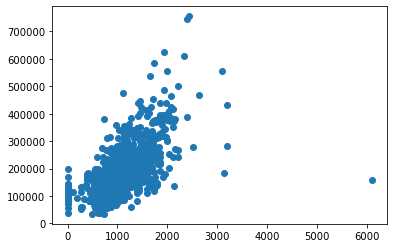

In [32]:
pyplot.scatter(Train["TotalBsmtSF"], Train["SalePrice"])

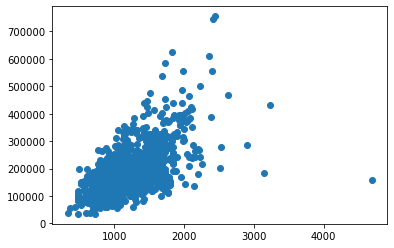

In [33]:
pyplot.scatter(Train["1stFlrSF"], Train["SalePrice"])

# ACTIVIDAD 2

 Se crea un nuevo dataset con las variables mas determinantes

In [126]:
NewTrain = Train.loc[:,["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF", "SalePrice"]]
NewTrain

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,SalePrice
0,7,1710,2,548,856,856,208500
1,6,1262,2,460,1262,1262,181500
2,7,1786,2,608,920,920,223500
3,7,1717,3,642,756,961,140000
4,8,2198,3,836,1145,1145,250000
...,...,...,...,...,...,...,...
1455,6,1647,2,460,953,953,175000
1456,6,2073,2,500,1542,2073,210000
1457,7,2340,1,252,1152,1188,266500
1458,5,1078,1,240,1078,1078,142125


Se crea una nueva variable para el dataset, la cual indica si el precio de la casa cumple o no cumple con el objetivo propuesto

In [219]:
NewTrain["Y"] = np.where(Train['SalePrice']>214000.000000 , 1, 0)
NewTrain

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,SalePrice,NEW_VAR,YVar,Y
0,7,1710,2,548,856,856,208500,0,0,0
1,6,1262,2,460,1262,1262,181500,0,0,0
2,7,1786,2,608,920,920,223500,1,1,1
3,7,1717,3,642,756,961,140000,0,0,0
4,8,2198,3,836,1145,1145,250000,1,1,1
...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,460,953,953,175000,0,0,0
1456,6,2073,2,500,1542,2073,210000,0,0,0
1457,7,2340,1,252,1152,1188,266500,1,1,1
1458,5,1078,1,240,1078,1078,142125,0,0,0


Se crean las variables X y Y para ser utilizadas en el modelo

In [220]:
Y = NewTrain["Y"].astype("int")
X = NewTrain.loc[:,["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF"]]

Se utiliza el algoritmo 
Random Forest para el modelo

In [221]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [222]:
Random_F = RandomForestClassifier(n_estimators = 100,max_depth=0.5, random_state=0)
Random_Fit = Random_F.fit(X, Y)

In [223]:
confusion_matrix(Y, Random_Fit.predict(X))

array([[1098,    0],
       [ 362,    0]], dtype=int64)

Se puede observar que la matriz de confusión no da buenos resultados

Se utiliza el algoritmo Arbol de Decisión para el modelo

In [224]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
import seaborn as sb
import matplotlib.pyplot as plt
from IPython.display import Image as PImage

In [226]:
DecisionTree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=20,
                                            min_samples_leaf=5,
                                            max_depth = 4,
                                            class_weight={1:3.5})
Tree = DecisionTree.fit(X, Y)

In [227]:

confusion_matrix(Y, Tree.predict(X))

array([[1008,   90],
       [  33,  329]], dtype=int64)

Precisión

In [200]:
(1008+329)/(1088+329+33+90)

0.8681818181818182

Especificidad

In [201]:

1008/(1008+90)

0.9180327868852459

Sensitividad

In [202]:
329/(329+33)

0.9088397790055248

Valor predictivo positivo

In [203]:
329/(329+90)

0.7852028639618138

Valor predictivo negativo

In [204]:
1008/(1008+33)

0.968299711815562

Se implementa la curva ROC

In [228]:
Prob = Tree.predict_proba(X)

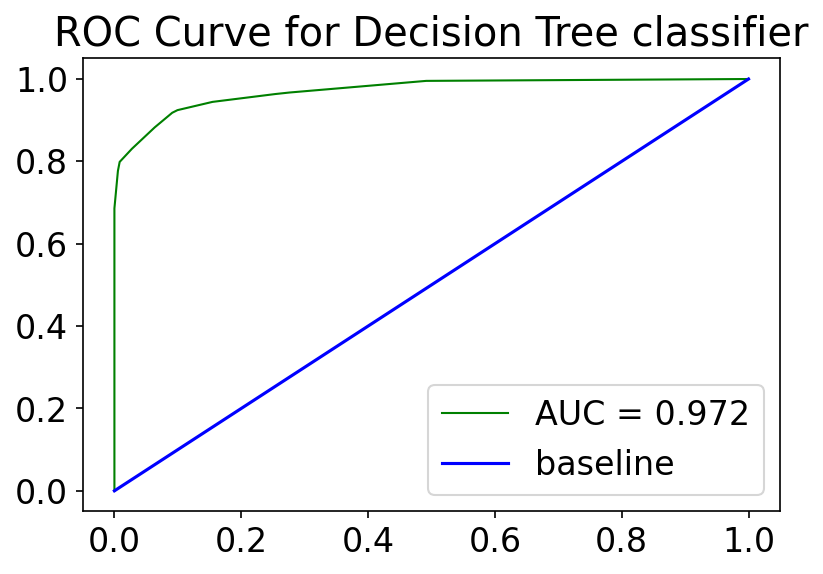

In [229]:
from sklearn.metrics import roc_curve, auc
# get false and true positive rates
fpr, tpr, thresholds = roc_curve(Y, Prob[:,0], pos_label=0)
base_fpr, base_tpr, _ = roc_curve(Y, [1 for _ in range(len(Y))])
# get area under the curve
roc_auc = auc(fpr, tpr)
# PLOT ROC curve
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for Decision Tree classifier')
plt.rcParams['font.size'] = 16
    # Plot both curves
plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
plt.legend();

Se puede observar que el resultado de la aplicación del algortimo de decisión dio muy buenos resultados con estas variables, ya que la especificidad y sensitividad tienen buenos valores

Se utiliza el algoritmo
Gradient Boosting para el modelo 

In [231]:
from sklearn.ensemble import GradientBoostingClassifier
GradBoost = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
        max_depth=1, random_state=0).fit(X, Y)
GradBoost.score(X, Y)

0.9465753424657535

In [232]:
confusion_matrix(Y, GradBoost.predict(X))

array([[1068,   30],
       [  48,  314]], dtype=int64)

Precisión

In [211]:
(1068+314)/(1068+314+48+30)

0.9465753424657535

Especificidad

In [212]:
1068/(1068+30)

0.9726775956284153

Sensitividad

In [213]:
314/(314+48)

0.8674033149171271

Valor predictivo positivo

In [214]:
314/(314+30)

0.9127906976744186

Valor predictivo negativo

In [215]:
1068/(1068+48)

0.956989247311828

se imlementa la curva ROC

In [234]:
Prob = GradBoost.predict_proba(X)

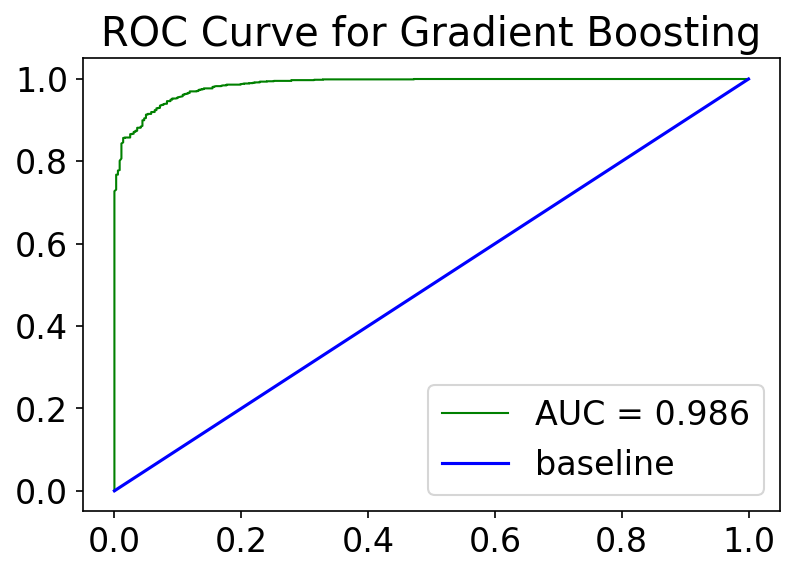

In [235]:

from sklearn.metrics import roc_curve, auc
# get false and true positive rates
fpr, tpr, thresholds = roc_curve(Y, Prob[:,0], pos_label=0)
base_fpr, base_tpr, _ = roc_curve(Y, [1 for _ in range(len(Y))])
# get area under the curve
roc_auc = auc(fpr, tpr)
# PLOT ROC curve
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for Gradient Boosting')
plt.rcParams['font.size'] = 16
    # Plot both curves
plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
plt.legend();

Se puede observar que el algoritmo de 
Gradient Boosting también da muy buenos resultados sobre todo en los valores predictivos positivo y negativo

Finalmente se elige el algoritmo de 
Gradient Boosting, ya que a pesar que el valor de sensitividad es un poco mas bajo, 
en el valor predictivo positivo es mejor que el algoritmo de árbol de decisión